<a href="https://colab.research.google.com/github/sjones1000/SPG_boundary/blob/main/Identify_living_horse_mussels_using_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identify living horse mussels in ROV footage: KTP interview challenge

Sam Jones

*Note: This work is based on a YOLO V8 tutorial (https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset/) and notebook (https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb?ref=blog.roboflow.com)*

*To speed up training, can enable GPU processing using edit > Notebook settings.*

Import operating system

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

Install YOLO V8

In [ ]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

Import annotated dataset from Roboflow

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

# Below: pasted from Roboflow 'Export' option

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="H1rIm3qjaNehwRvJlC1L")
project = rf.workspace("ws1-onnaw").project("horse-mussels")
version = project.version(1)
dataset = version.download("yolov8")

First pass at training using my annotated dataset.  Parameters are left at default

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True

Examine files output from training

In [ ]:
!ls {HOME}/runs/detect/train2/

Output a couple of diagnostic plots to assess the model skill

/content


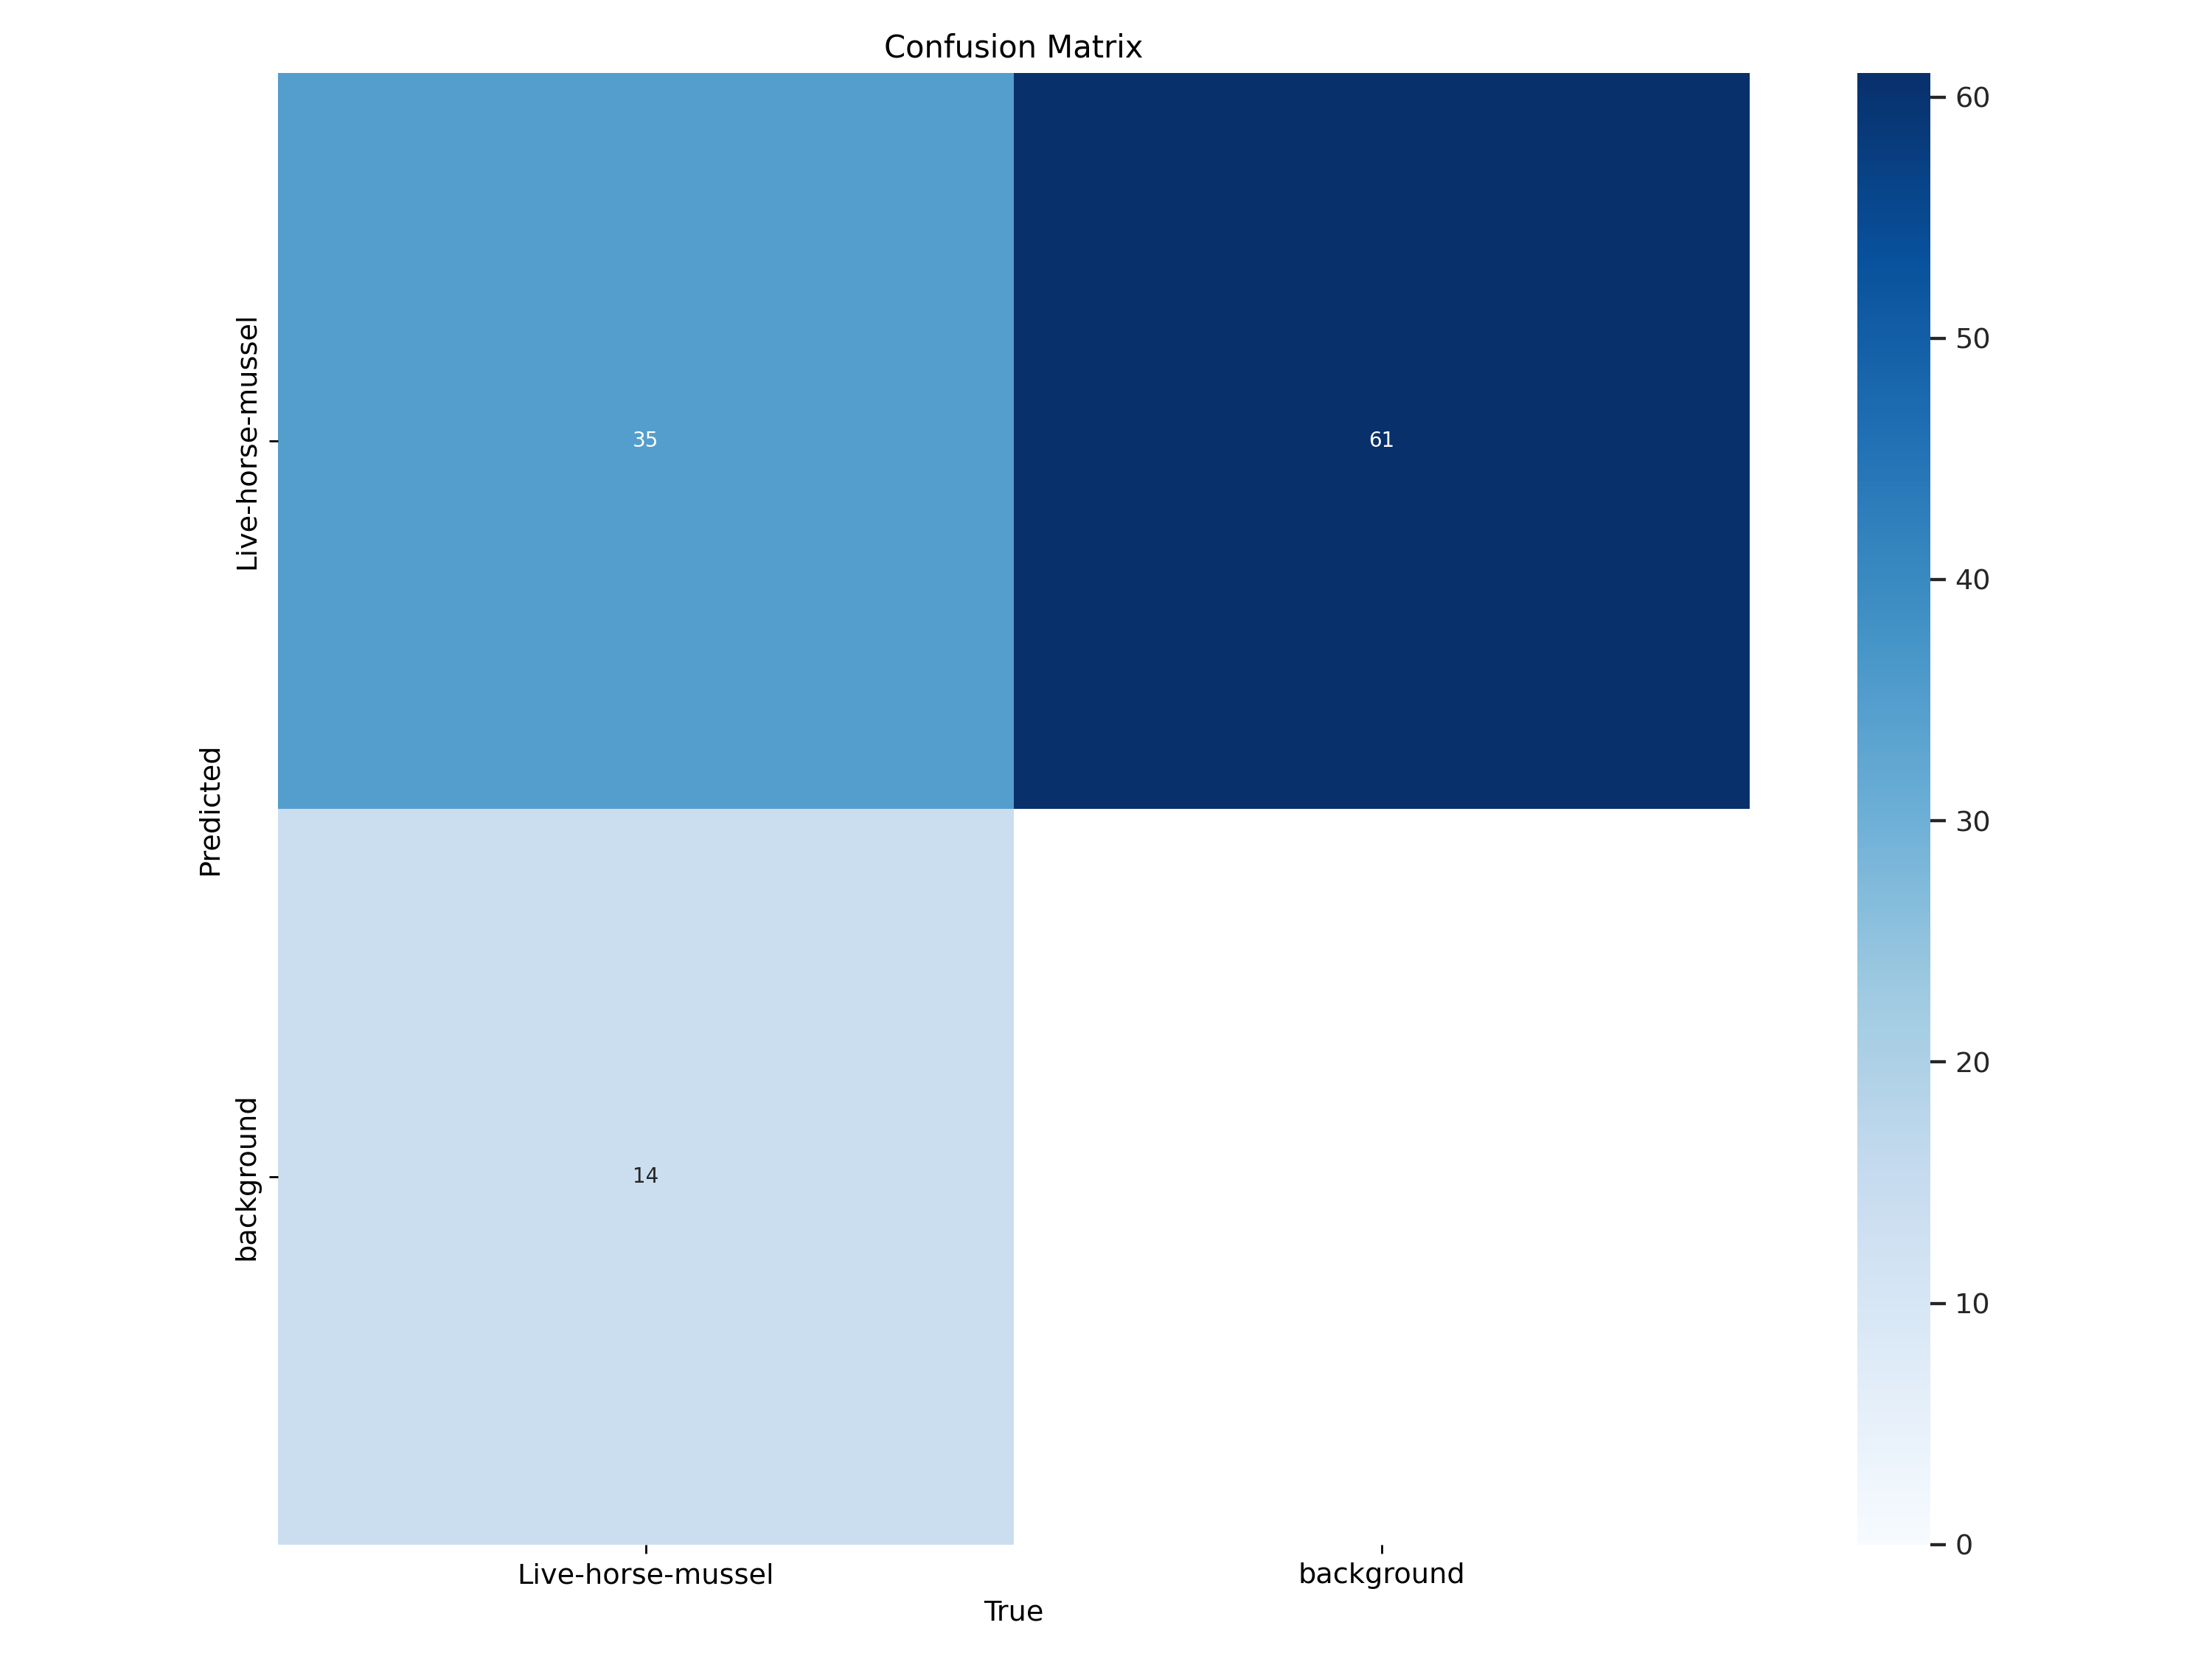

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


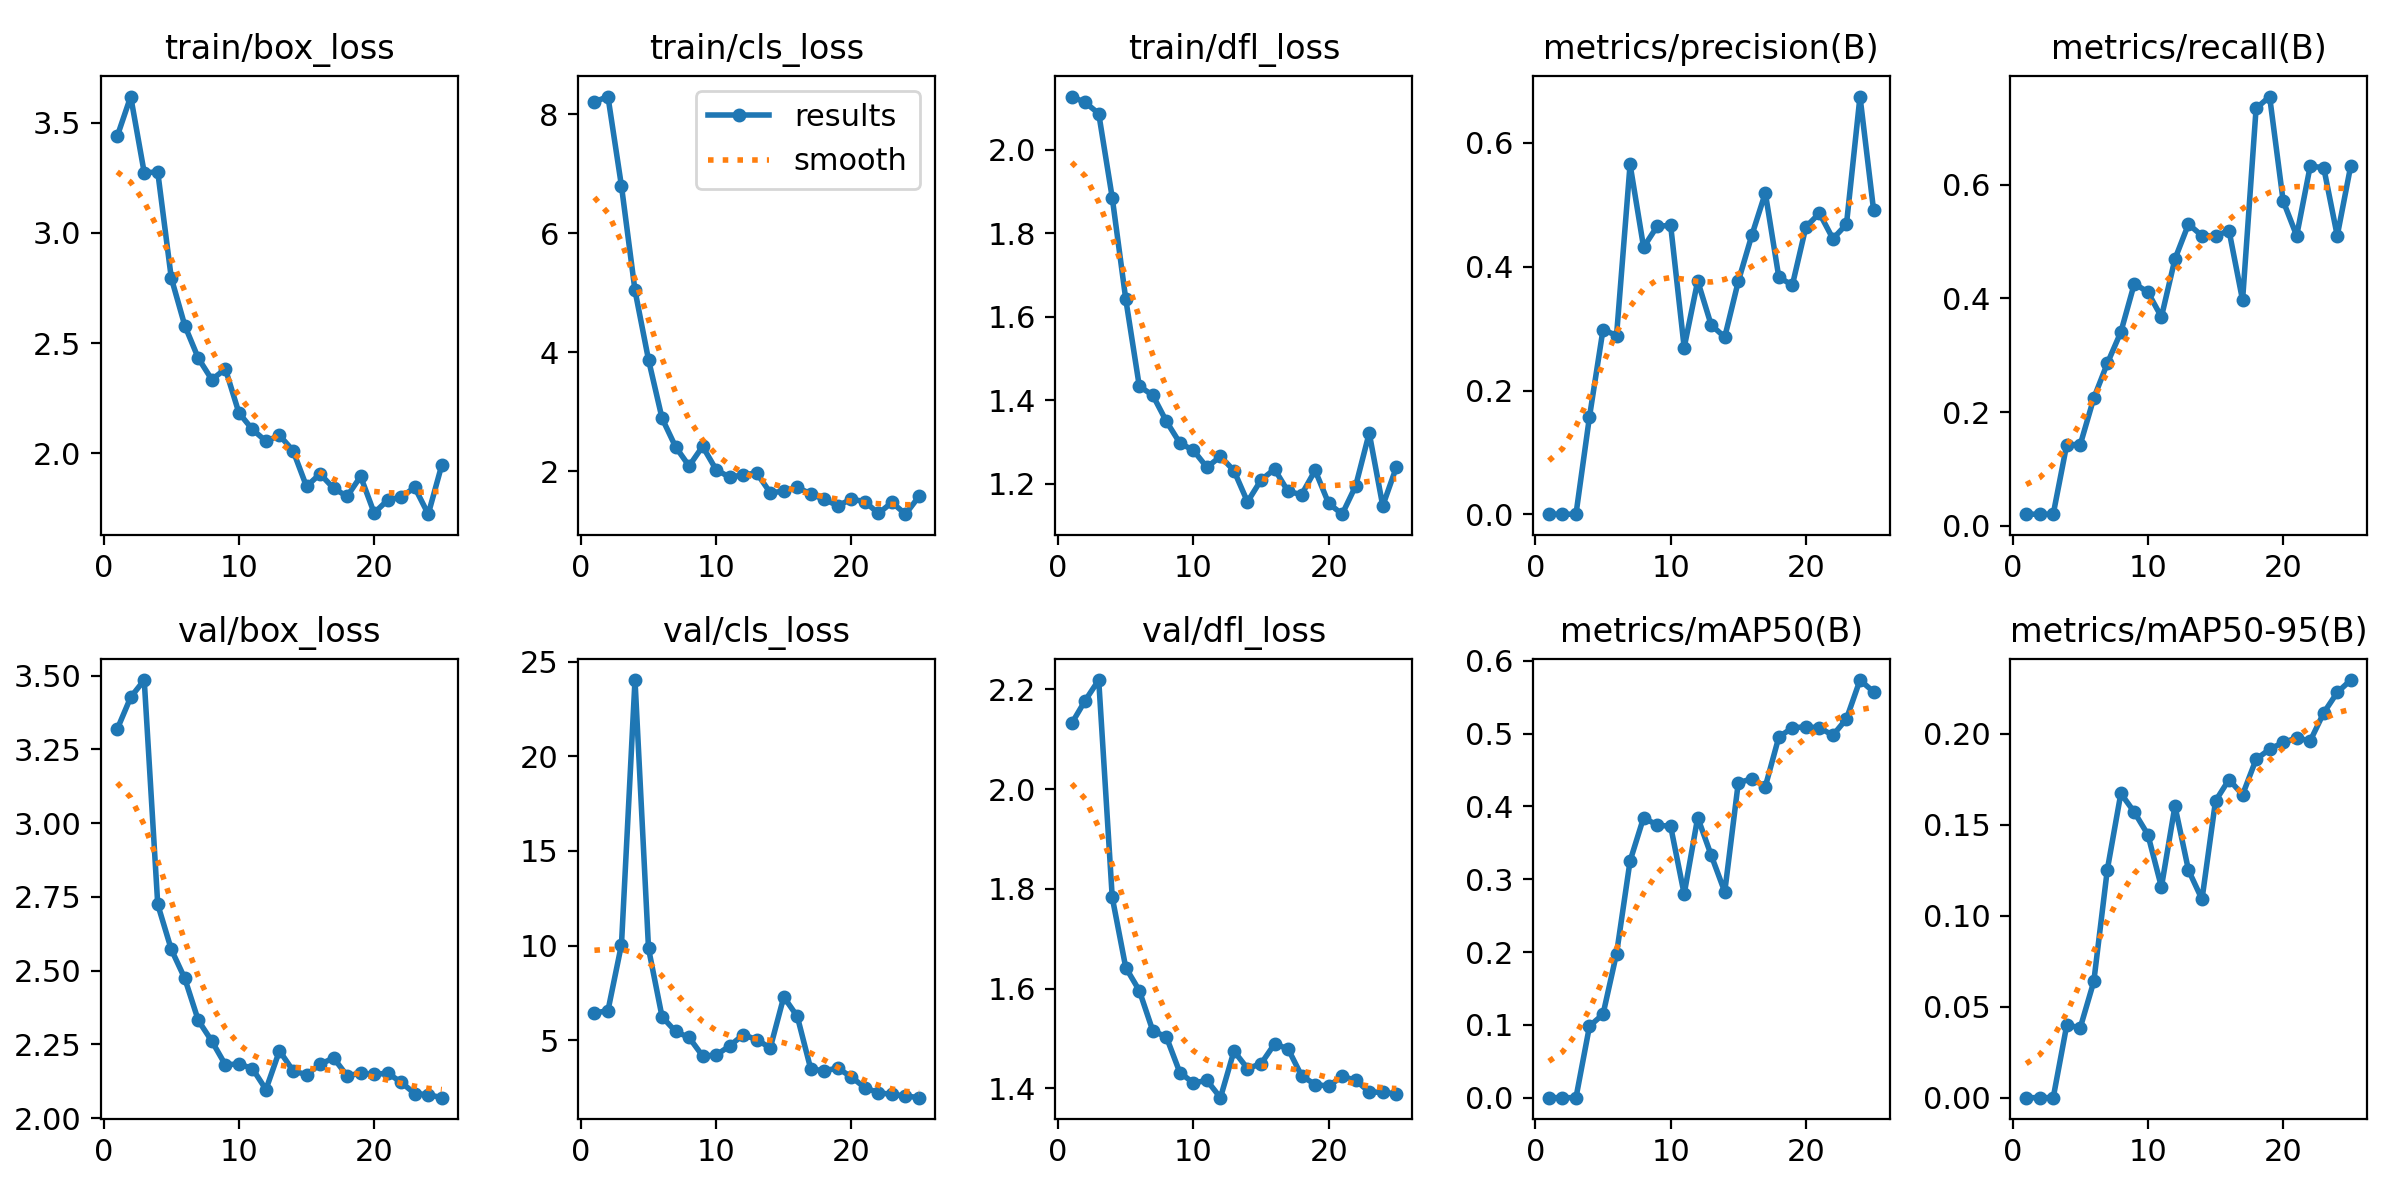

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

Display images from the validation subset

/content


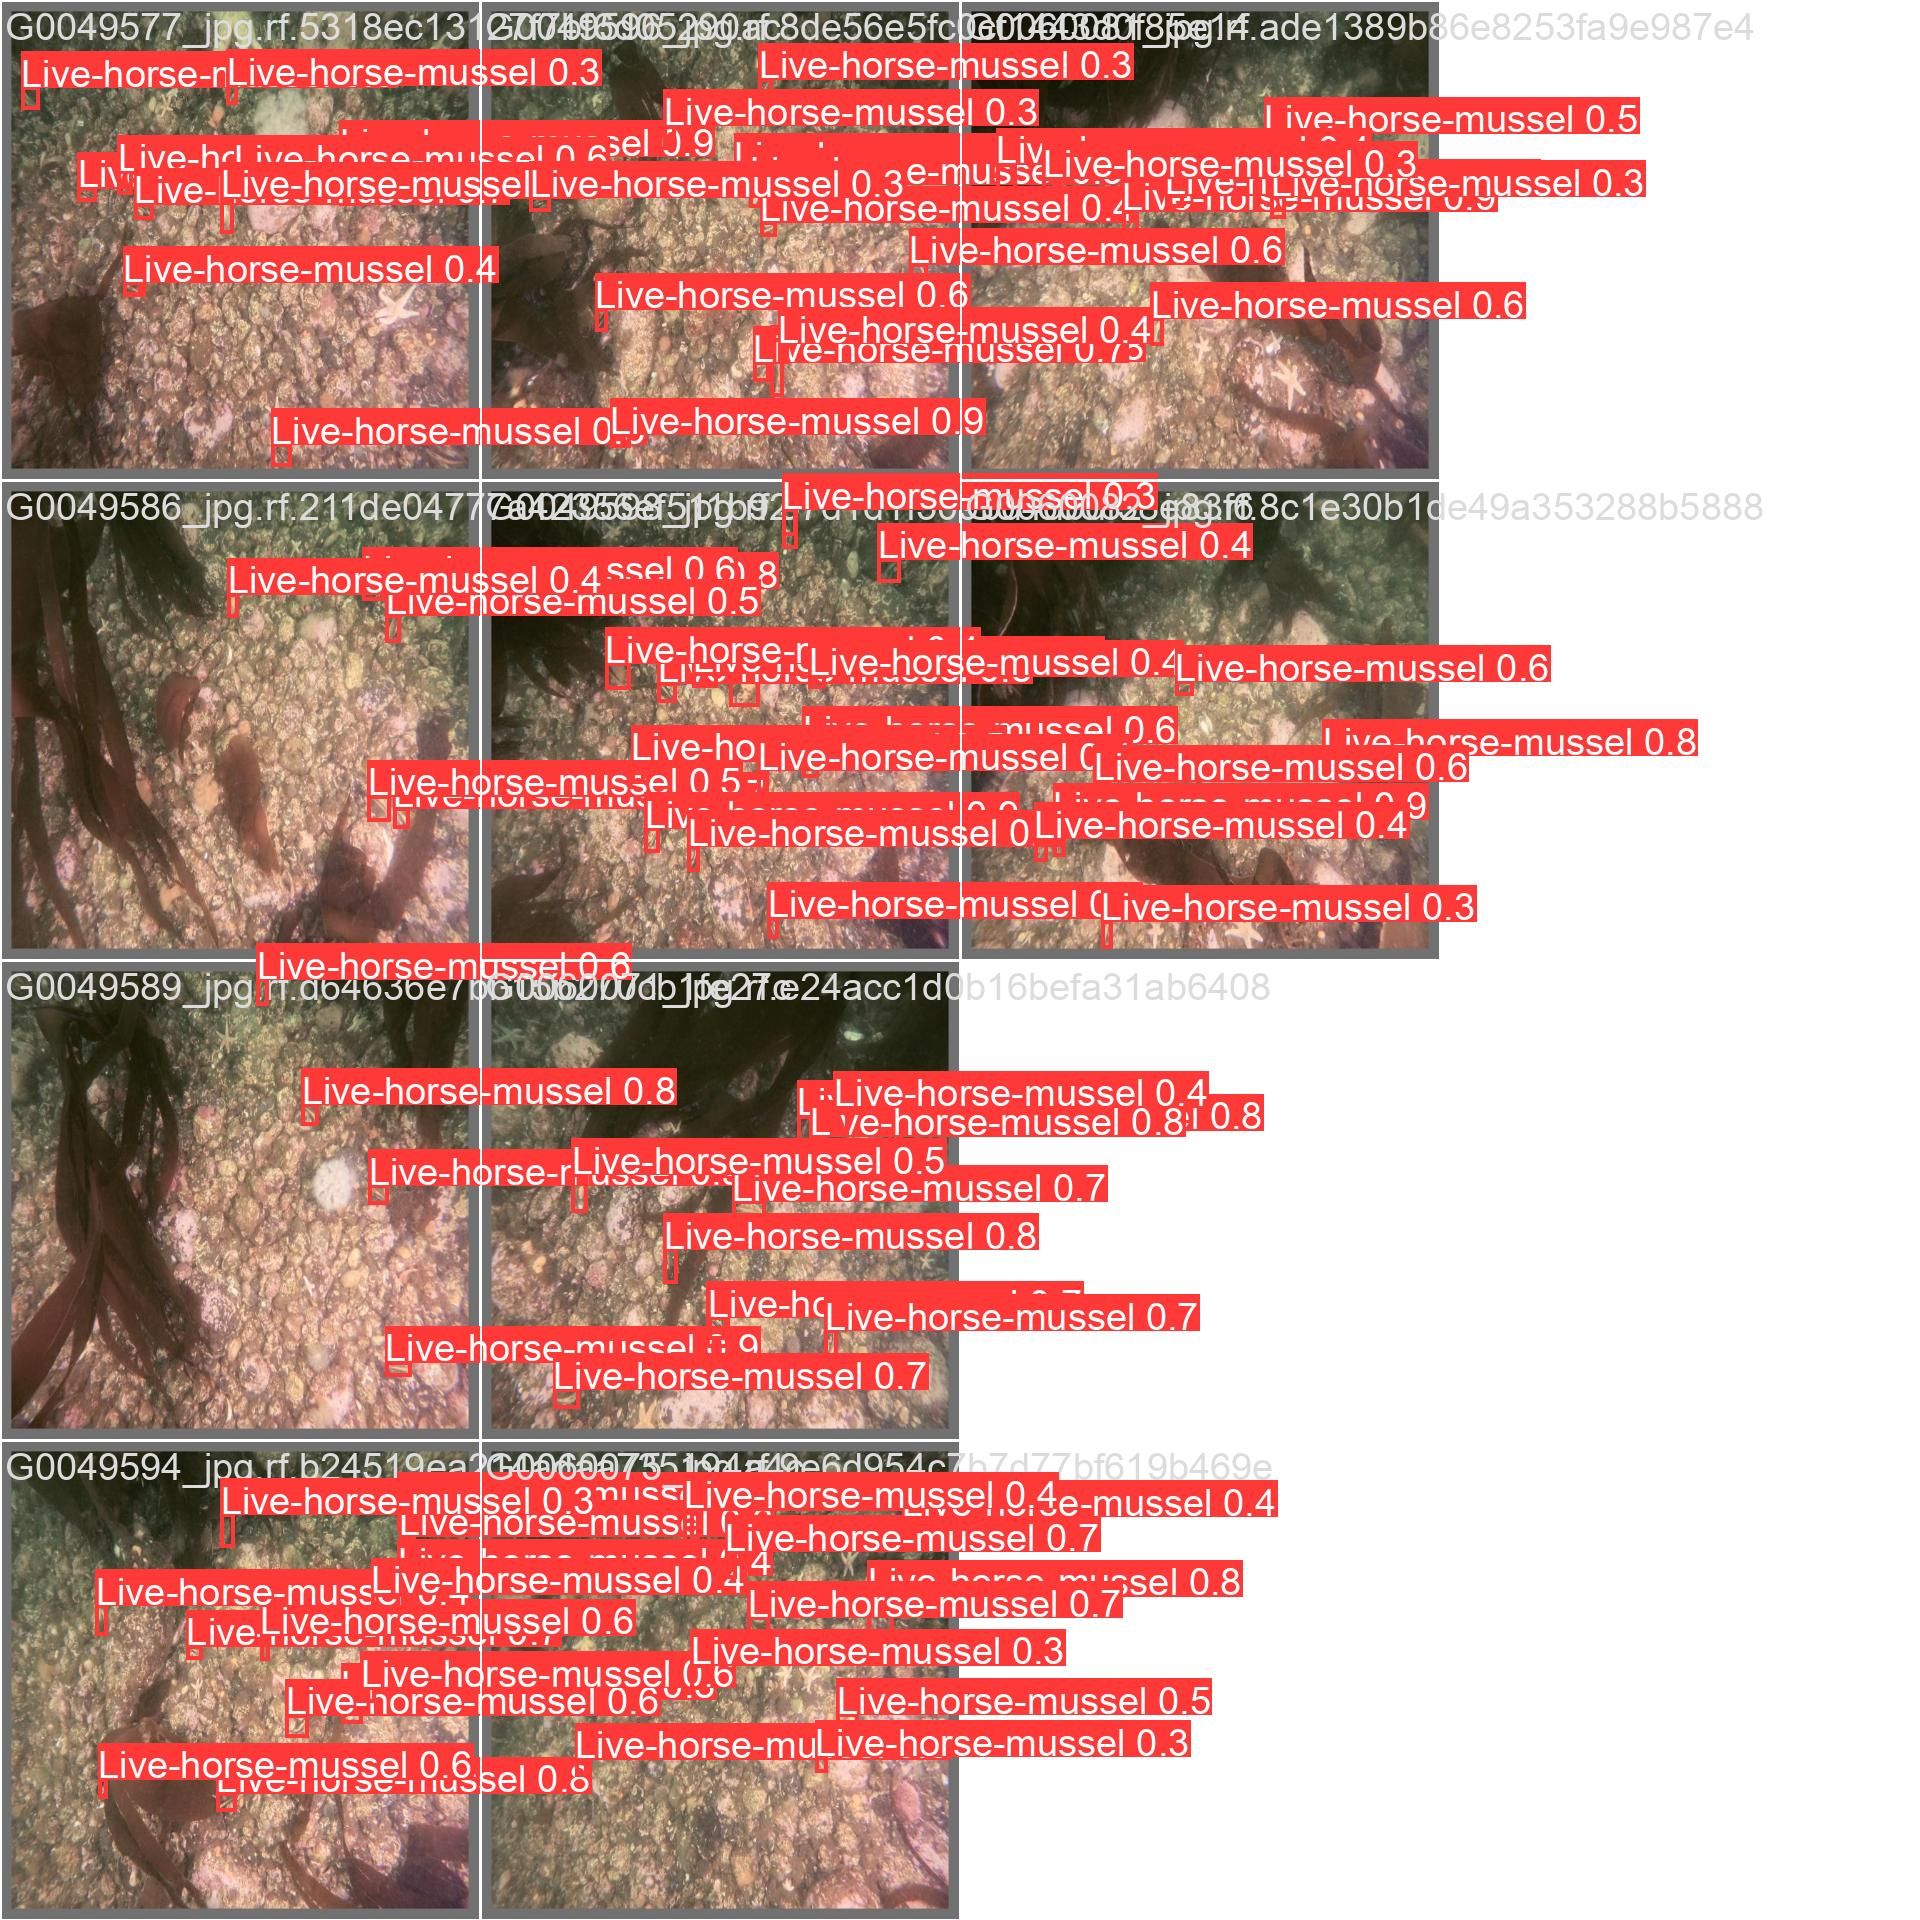

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=800)

Perform validation using image subset

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

Perform inference on new images (not part of the training dataset)

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

How does the model perform on new images?

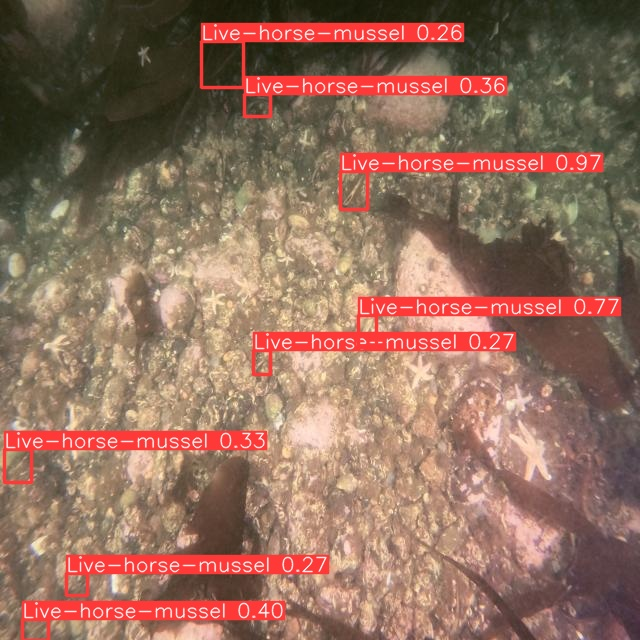

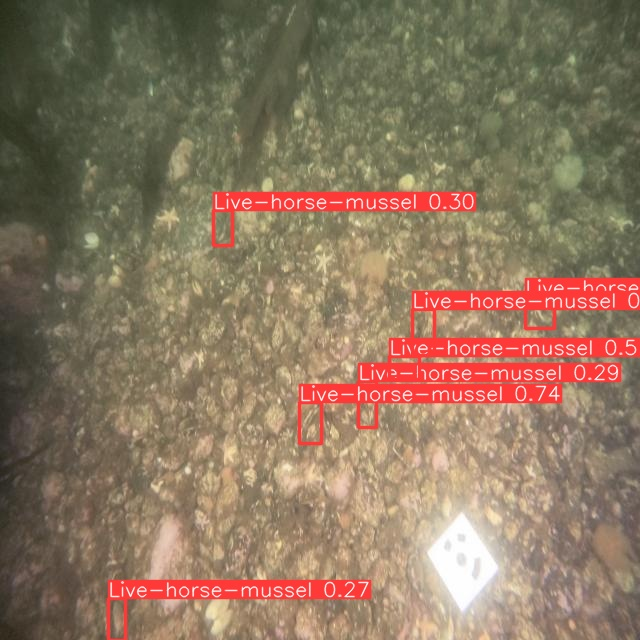

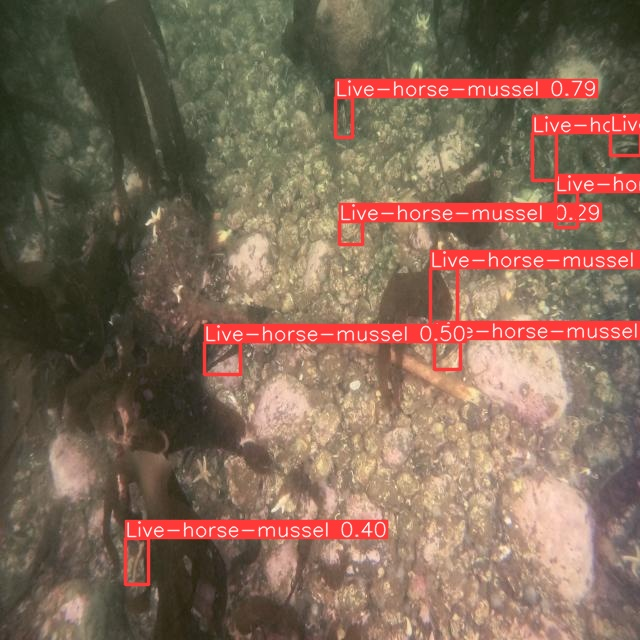

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

Deploy the model on Roboflow

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train2/")

View the status of your deployment at: https://app.roboflow.com/ws1-onnaw/horse-mussels/1
Share your model with the world at: https://universe.roboflow.com/ws1-onnaw/horse-mussels/model/1
